## Diabetes Classification with L layer Neural Network

#### Import Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

# Get the absolute path to the Shared folder
shared_path = os.path.abspath('..')

# Add to sys.path if not already there
if shared_path not in sys.path:
    sys.path.append(shared_path)
print(sys.path)


plt.style.use('ggplot')

['/home/sriram/stacksville/repos/cari-seetha', '/home/sriram/stacksville/repos/cari-seetha/api', '/home/sriram/stacksville/repos/tcup-seetha', '/home/sriram/stacksville/repos/tcup-seetha/tcup', '/home/sriram/projects/deep_learning/diabetes_classification', '/usr/lib64/python312.zip', '/usr/lib64/python3.12', '/usr/lib64/python3.12/lib-dynload', '', '/home/sriram/projects/deep_learning/venv/lib64/python3.12/site-packages', '/home/sriram/projects/deep_learning/venv/lib/python3.12/site-packages', '/home/sriram/projects/deep_learning/core', '/home/sriram/projects/deep_learning']


### Load Dataset

In [81]:
original = pd.read_csv('dataset.csv')
original.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


### Data Cleaning and Manipulation

In [82]:
original.shape

(1000, 14)

In [83]:
df = original.drop(['ID'], axis=1).copy()
df.columns

Index(['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

#### Manipulating empty or null values

In [84]:
df.isna().sum()

No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

#### Remove duplicates

In [85]:
df.loc[df.duplicated()]


,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


In [86]:
df['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [87]:
df['CLASS'] = df['CLASS'].apply(lambda v: v.strip())
df['Gender'] = df['Gender'].apply(lambda v: v.strip().upper())

In [88]:
df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [90]:
df['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

### Data Exploration

<Axes: title={'center': 'Diabetes Distribution'}, xlabel='CLASS'>

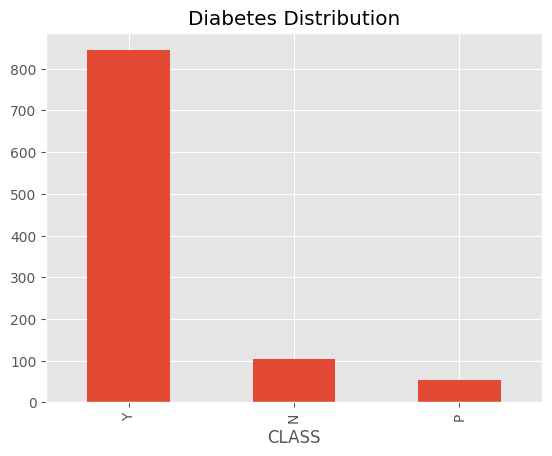

In [91]:
df['CLASS'].value_counts().plot(kind='bar', title='Diabetes Distribution')

<Axes: xlabel='Gender'>

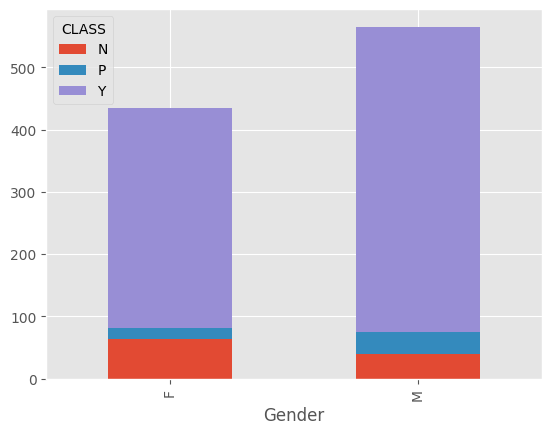

In [110]:
df.groupby(['Gender', 'CLASS']).size().unstack(fill_value=0).plot(kind='bar', stacked=True)

In [15]:
from core.main import test
test()

Core Package: v0.0
